In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical


In [2]:
#Step 2 - Load Data
fashion_df = pd.read_csv('fashion-mnist.csv', sep=',')

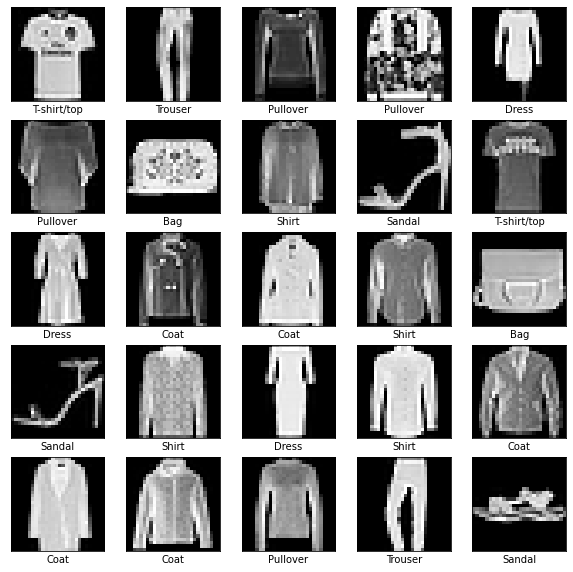

In [3]:
# Step 3 - Visualization

label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = fashion_df.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.xlabel(label_names[fashion_df.iloc[i, 0]])
plt.show()


In [4]:
# Step 4 - Preprocess Data

# Convert the dataframe to numpy array
dataset = np.asarray(fashion_df, dtype='float32')

# Separate features and labels
X = dataset[:, 1:] / 255.0  # Normalize pixel values to the range [0, 1]
y = dataset[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data into 28x28x1 images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
# Step 5 - Build the Model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Step 6 - Train the Model
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
63/63 [==============================] - 6s 67ms/step - loss: 1.0418 - accuracy: 0.6399 - val_loss: 0.5673 - val_accuracy: 0.8030
Epoch 2/10
63/63 [==============================] - 4s 61ms/step - loss: 0.6430 - accuracy: 0.7747 - val_loss: 0.5026 - val_accuracy: 0.8250
Epoch 3/10
63/63 [==============================] - 4s 65ms/step - loss: 0.5465 - accuracy: 0.8086 - val_loss: 0.4555 - val_accuracy: 0.8390
Epoch 4/10
63/63 [==============================] - 4s 68ms/step - loss: 0.4804 - accuracy: 0.8299 - val_loss: 0.4322 - val_accuracy: 0.8460
Epoch 5/10
63/63 [==============================] - 4s 61ms/step - loss: 0.4486 - accuracy: 0.8444 - val_loss: 0.4078 - val_accuracy: 0.8555
Epoch 6/10
63/63 [==============================] - 4s 61ms/step - loss: 0.4176 - accuracy: 0.8526 - val_loss: 0.3962 - val_accuracy: 0.8655
Epoch 7/10
63/63 [==============================] - 4s 62ms/step - loss: 0.3986 - accuracy: 0.8633 - val_loss: 0.3826 - val_accuracy: 0.8685
Epoch 8/10
63

In [7]:
# Step 7 - Evaluate the Model

_, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

63/63 [==============================] - 1s 9ms/step - loss: 0.3577 - accuracy: 0.8775
Test Accuracy: 0.8774999976158142


In [8]:
# Step 8 - Make Predictions

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


63/63 [==============================] - 1s 6ms/step


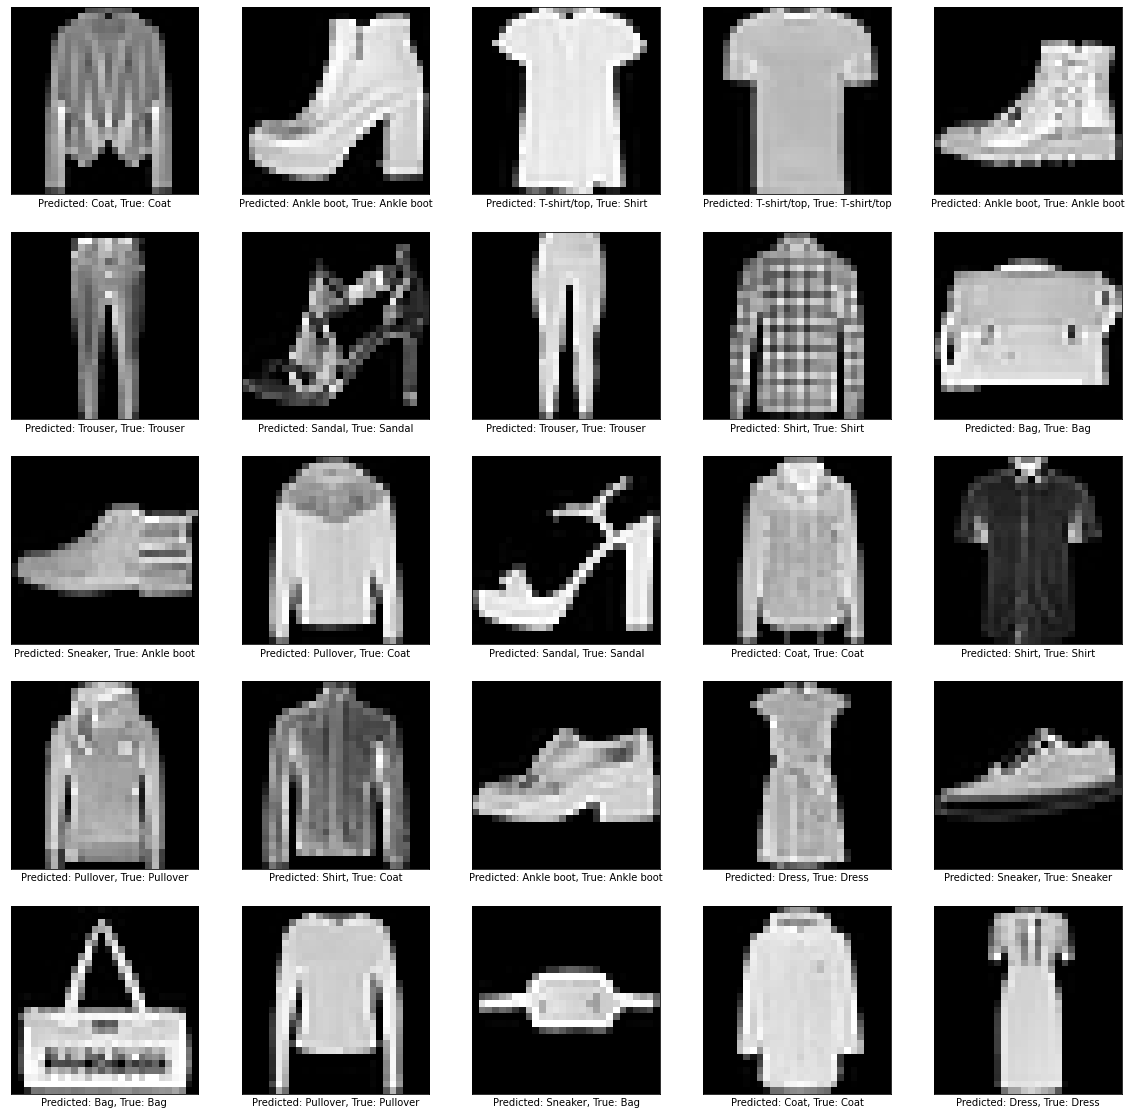

In [9]:
# Step 9 - Visualize Predictions

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.xlabel(f"Predicted: {label_names[predicted_labels[i]]}, True: {label_names[np.argmax(y_test[i])]}")

plt.show()